In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [5]:
divvy_jan = pd.read_csv("202301-divvy-tripdata.csv")
divvy_jan.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,F96D5A74A3E41399,electric_bike,2023-01-21 20:05:42,2023-01-21 20:16:33,Lincoln Ave & Fullerton Ave,TA1309000058,Hampden Ct & Diversey Ave,202480.0,41.924074,-87.646278,41.930000,-87.640000,member
1,13CB7EB698CEDB88,classic_bike,2023-01-10 15:37:36,2023-01-10 15:46:05,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
2,BD88A2E670661CE5,electric_bike,2023-01-02 07:51:57,2023-01-02 08:05:11,Western Ave & Lunt Ave,RP-005,Valli Produce - Evanston Plaza,599,42.008571,-87.690483,42.039742,-87.699413,casual
3,C90792D034FED968,classic_bike,2023-01-22 10:52:58,2023-01-22 11:01:44,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member
4,3397017529188E8A,classic_bike,2023-01-12 13:58:01,2023-01-12 14:13:20,Kimbark Ave & 53rd St,TA1309000037,Greenwood Ave & 47th St,TA1308000002,41.799568,-87.594747,41.809835,-87.599383,member


In [6]:
#checking the information of the data

divvy_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190301 entries, 0 to 190300
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             190301 non-null  object 
 1   rideable_type       190301 non-null  object 
 2   started_at          190301 non-null  object 
 3   ended_at            190301 non-null  object 
 4   start_station_name  163580 non-null  object 
 5   start_station_id    163580 non-null  object 
 6   end_station_name    162461 non-null  object 
 7   end_station_id      162461 non-null  object 
 8   start_lat           190301 non-null  float64
 9   start_lng           190301 non-null  float64
 10  end_lat             190174 non-null  float64
 11  end_lng             190174 non-null  float64
 12  member_casual       190301 non-null  object 
dtypes: float64(4), object(9)
memory usage: 18.9+ MB


In [7]:
#couting the member distribution

divvy_jan["member_casual"].value_counts()

member    150293
casual     40008
Name: member_casual, dtype: int64

In [8]:
#checking the empty values

divvy_jan.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    26721
start_station_id      26721
end_station_name      27840
end_station_id        27840
start_lat                 0
start_lng                 0
end_lat                 127
end_lng                 127
member_casual             0
dtype: int64

In [9]:
#Transformando as colunas de data e hora em datetime para Pandas
divvy_jan["start_datetime"] = pd.to_datetime(divvy_jan["started_at"], format = "%Y-%m-%d %H:%M:%S", errors= "coerce")

In [10]:
divvy_jan["end_datetime"] = pd.to_datetime(divvy_jan["ended_at"])

In [11]:
#criando colunas ano-mes-dia-hora-min-seg para realizar seleções especificas

#start_date
divvy_jan["start_year"] = divvy_jan["start_datetime"].dt.year
divvy_jan["start_month"] = divvy_jan["start_datetime"].dt.month
divvy_jan["start_day"] = divvy_jan["start_datetime"].dt.day
divvy_jan["start_hour"] = divvy_jan["start_datetime"].dt.hour
divvy_jan["start_minute"] = divvy_jan["start_datetime"].dt.minute
divvy_jan["start_minute"] = divvy_jan["start_datetime"].dt.minute
divvy_jan["start_dow"] = divvy_jan["start_datetime"].dt.day_name()

#end_date
divvy_jan["end_year"] = divvy_jan["end_datetime"].dt.year
divvy_jan["end_month"] = divvy_jan["end_datetime"].dt.month
divvy_jan["end_day"] = divvy_jan["end_datetime"].dt.day
divvy_jan["end_hour"] = divvy_jan["end_datetime"].dt.hour
divvy_jan["end_minute"] = divvy_jan["end_datetime"].dt.minute
divvy_jan["end_dow"] = divvy_jan["end_datetime"].dt.day_name()

#adding travel duration
divvy_jan["travel_duration"] = (divvy_jan["end_datetime"] - divvy_jan["start_datetime"]).dt.total_seconds() / 60

In [12]:
#checking the information of the data after adding datetime data. 

divvy_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190301 entries, 0 to 190300
Data columns (total 28 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             190301 non-null  object        
 1   rideable_type       190301 non-null  object        
 2   started_at          190301 non-null  object        
 3   ended_at            190301 non-null  object        
 4   start_station_name  163580 non-null  object        
 5   start_station_id    163580 non-null  object        
 6   end_station_name    162461 non-null  object        
 7   end_station_id      162461 non-null  object        
 8   start_lat           190301 non-null  float64       
 9   start_lng           190301 non-null  float64       
 10  end_lat             190174 non-null  float64       
 11  end_lng             190174 non-null  float64       
 12  member_casual       190301 non-null  object        
 13  start_datetime      190301 no

In [13]:
#Checking the dow frequency.  

day_count = divvy_jan.groupby(["start_dow", "member_casual"])[["start_station_name", "end_station_name"]].value_counts().reset_index().copy()
day_count.columns = ["start_name","end_name","dow", "membership","total"]

In [14]:
day_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89319 entries, 0 to 89318
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   start_name  89319 non-null  object
 1   end_name    89319 non-null  object
 2   dow         89319 non-null  object
 3   membership  89319 non-null  object
 4   total       89319 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 3.4+ MB


<Axes: xlabel='start_dow', ylabel='start_hour'>

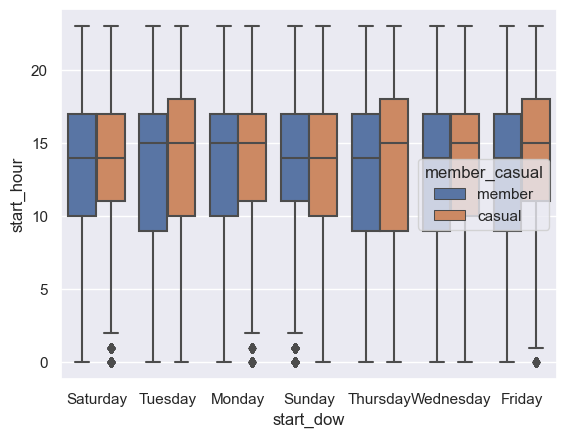

In [15]:
#checking the hour the bikes are used by members by weekdays

sns.boxplot(data = divvy_jan, 
            x = "start_dow", 
            y = "start_hour",
            hue= "member_casual")

<Axes: xlabel='start_dow', ylabel='travel_duration'>

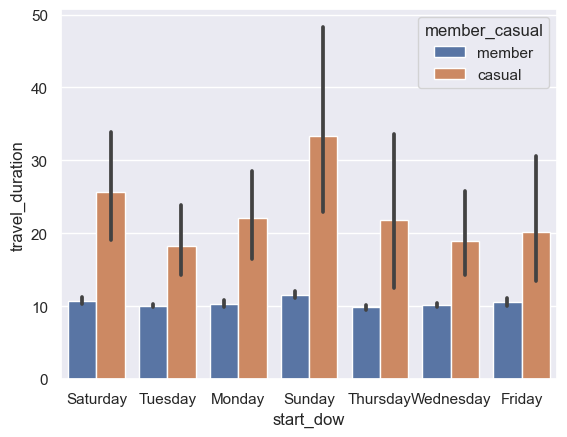

In [16]:
#2 categorical and 1 numerical
# Checking the average use time by users on weekdays
sns.barplot(data = divvy_jan,
            x = "start_dow", 
            y = "travel_duration", 
            hue = "member_casual")

In [17]:
# Creating a dataset with the mean time use by users.
mean_time = divvy_jan.groupby(["start_dow", "member_casual"])[["travel_duration"]].mean().reset_index()
mean_time.columns = ["start_dow", "member_casual", "travel_duration"]

<Axes: xlabel='start_dow', ylabel='travel_duration'>

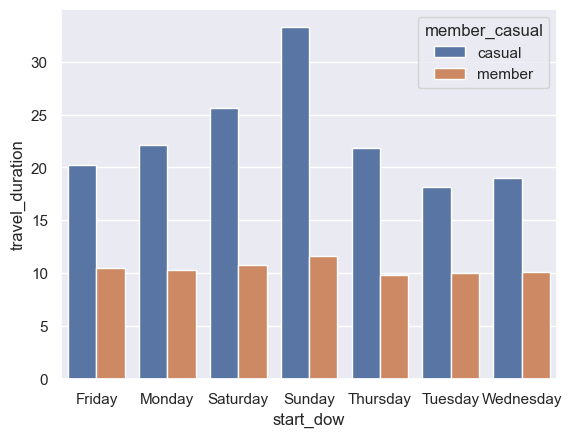

In [18]:
# Ploting the new dataset with the man information
sns.barplot(data = mean_time,
            x = "start_dow", 
            y = "travel_duration", 
            hue = "member_casual")

In [19]:
# Creating a dataset with the type of bike the users like the most by dow

bike_preference = divvy_jan.groupby(["start_dow", "member_casual"])[["rideable_type"]].value_counts().reset_index()
bike_preference.columns = ["start_dow","member_casual", "rideable_type", "total"]


<Axes: xlabel='start_dow', ylabel='total'>

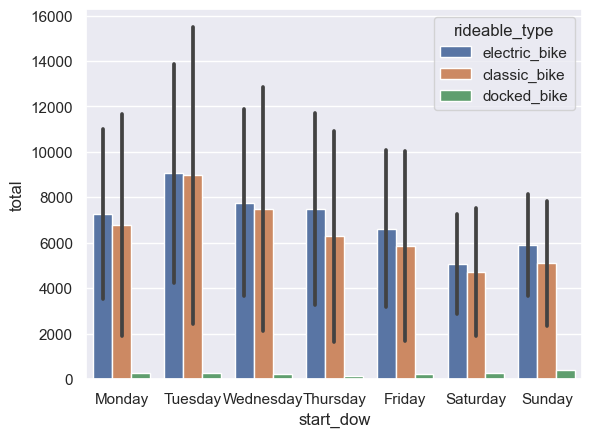

In [20]:
sns.barplot(data = bike_preference,
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

<Axes: xlabel='start_dow', ylabel='total'>

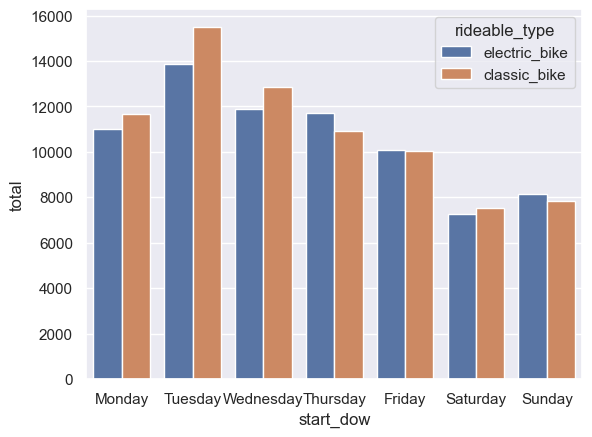

In [21]:
# Most used bikes by members.
sns.barplot(bike_preference.query("member_casual == 'member'"),
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])


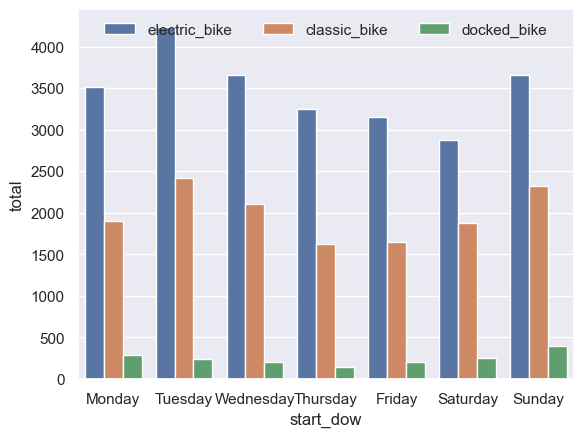

In [22]:
# Most used bikes by casuals.
casual_bike_type_plot = sns.barplot(bike_preference.query("member_casual == 'casual'"),
            x = "start_dow", 
            y = "total", 
            hue = "rideable_type",
            order= ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])
sns.move_legend(casual_bike_type_plot, 
                "upper center",
                bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False,)